In [16]:
# Libraries allowed
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
# original median_filter methods
def genNoise(img):
    # gray level check
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # generate a matrix with the same size as the input function
    x, y = img.shape
    t1 = np.random.randint(0, 256, (x, y), dtype=np.uint8)
    t2 = np.random.randint(0, 256, (x, y), dtype=np.uint8)
    
    # copy image just in case
    noisy_img = img.copy()
    
    # generate the required noise
    noisy_img[img > t1] = 255
    noisy_img[img < t2] = 0
    return noisy_img

def medianFilter(img, window_size=3):
    # create a copy
    filtered_img = img.copy()
    rows, cols = img.shape
    offset = window_size // 2
    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            # get the window pixel neighbors
            neighbors = img[i - offset:i + offset + 1, j - offset:j + offset + 1].flatten()
            # median
            filtered_img[i, j] = np.median(neighbors)
    return filtered_img

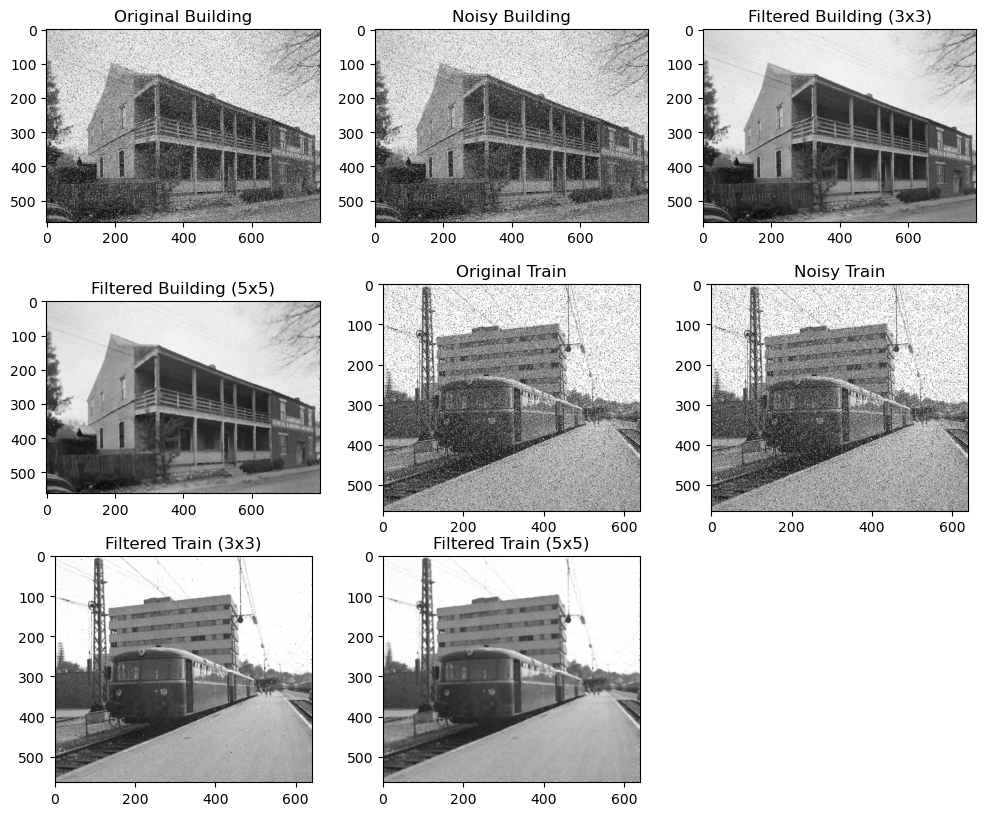

In [18]:
# load the images
building_image = cv2.imread('./pro1_building.jpg', cv2.IMREAD_GRAYSCALE)
train_image = cv2.imread('./pro1_train.jpg', cv2.IMREAD_GRAYSCALE)

# median filters
filtered_building_3x3 = medianFilter(noisy_building, 3)
filtered_train_3x3 = medianFilter(noisy_train, 3)

filtered_building_5x5 = medianFilter(noisy_building, 5)
filtered_train_5x5 = medianFilter(noisy_train, 5)

# show as required
plt.figure(figsize=(12, 10))

plt.subplot(3, 3, 1)
plt.title("Original Building")
plt.imshow(building_image, cmap='gray')

plt.subplot(3, 3, 2)
plt.title("Noisy Building")
plt.imshow(noisy_building, cmap='gray')

plt.subplot(3, 3, 3)
plt.title("Filtered Building (3x3)")
plt.imshow(filtered_building_3x3, cmap='gray')

plt.subplot(3, 3, 4)
plt.title("Filtered Building (5x5)")
plt.imshow(filtered_building_5x5, cmap='gray')

plt.subplot(3, 3, 5)
plt.title("Original Train")
plt.imshow(train_image, cmap='gray')

plt.subplot(3, 3, 6)
plt.title("Noisy Train")
plt.imshow(noisy_train, cmap='gray')

plt.subplot(3, 3, 7)
plt.title("Filtered Train (3x3)")
plt.imshow(filtered_train_3x3, cmap='gray')

plt.subplot(3, 3, 8)
plt.title("Filtered Train (5x5)")
plt.imshow(filtered_train_5x5, cmap='gray')

plt.show()

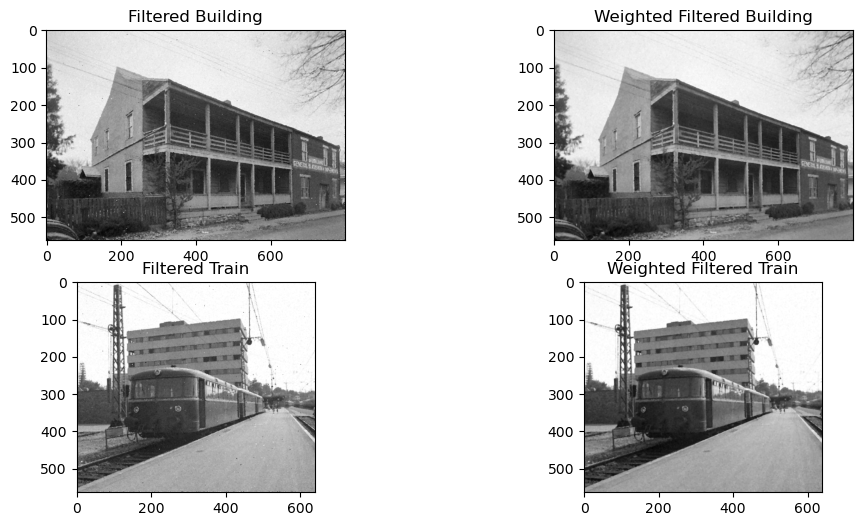

In [19]:
def weightedMedianFilter(img, weights):
    # get the size of image
    rows, cols = img.shape
    #  initialized
    filtered_img = np.zeros_like(img)
    # get size of weights array
    wrows, wcols = weights.shape
    w_half = wrows // 2
    
    for i in range(rows):
        for j in range(cols):
            # get the value and weight of windows
            window_vals = []
            for m in range(wrows):
                for n in range(wcols):
                    r = i + m - w_half
                    c = j + n - w_half
                    if r >= 0 and r < rows and c >= 0 and c < cols:
                        # add value depends on weights
                        window_vals.extend([img[r, c]] * weights[m, n])
            # caculate the median value
            filtered_img[i, j] = np.median(window_vals)
    
    return filtered_img

weights = np.array([
    [0, 1, 1, 1, 0],
    [1, 2, 2, 2, 1],
    [1, 2, 4, 2, 1],
    [1, 2, 2, 2, 1],
    [0, 1, 1, 1, 0]
])

filtered_building = weightedMedianFilter(building_image, weights)
filtered_train = weightedMedianFilter(train_image, weights)

# show as required
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title('Filtered Building')
plt.imshow(filtered_building_3x3, cmap='gray')
plt.subplot(2, 2, 2)
plt.title('Weighted Filtered Building')
plt.imshow(filtered_building, cmap='gray')
plt.subplot(2, 2, 3)
plt.title('Filtered Train')
plt.imshow(filtered_train_3x3, cmap='gray')
plt.subplot(2, 2, 4)
plt.title('Weighted Filtered Train')
plt.imshow(filtered_train, cmap='gray')
plt.show()
